In [1]:
import sys
sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')

import numpy as np
import astropy.io.fits as pf
from astropy.table import Table, vstack
import pylab as mplot
import yaml
import h5py
import healpy as hp

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/chihway/.conda/envs/shear_decade/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['vstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
bad_tile_list = np.genfromtxt('bad_tiles.txt', dtype='str')[:,1]

In [3]:
full_tile_list = np.genfromtxt('../Tilelist_DR3_1_1.csv', dtype='str', delimiter=",")[1:]

In [4]:
# number of bad tiles in the astrofix list
for tile in bad_tile_list:
    !more ../Tilelist_DR3_1_1_ASTROFIX.csv|grep {tile}

DES1027-1915, DEC_Taiga/multiepoch/delve/r6101/DES1027-1915/p01/coadd


In [5]:
astrofix_tile_list = np.genfromtxt('../Tilelist_DR3_1_1_ASTROFIX.csv', dtype='str', delimiter=",")[1:]

In [6]:
!more bad_tiles.txt

0	DES0934-0207
261	DES0908-0915
468	DES1027-1915
809	DES1014-0124
904	DES1142-1207
1567	DES1057-0958
1975	DES1003+0209
2092	DES1058-0915
2350	DES0957+0209
2444	DES1000+0209
2736	DES1120-0750
3089	DES1024-1915
3172	DES0910-0958
3184	DES0907-0958
3255	DES0911-0915
3374	DES0955-2124
3974	DES0959+0126
4032	DES1100-0958
4398	DES1021-0333
4489	DES1026-1832
4951	DES1101-0915
5024	DES1000+0252
5721	DES1117-0750


In [7]:
# tiles that failed metacal == bad tiles

In [7]:
with h5py.File('/project2/chihway/data/decade/metacal_test_20230427.hdf', 'r') as h5r:

    size = h5r['mcal_T_ratio_noshear'][:]
    s2n = h5r['mcal_s2n_noshear'][:]
    ra = h5r['ra'][:]
    dec = h5r['dec'][:]

In [17]:
RA_tile = []
DEC_tile = []
for i in range(len(bad_tile_list)):
    tile = bad_tile_list[i][3:]
    ra_hr = float(tile[:2])*15
    ra_min = float(tile[2:4])/60*15
    ra_tile = ra_hr+ra_min
    dec_sign = np.sign(float(tile[4:7]))
    dec_deg = float(tile[5:7])
    dec_arcmin = float(tile[7:9])/60
    dec_tile = dec_sign*(dec_deg+dec_arcmin)
    RA_tile.append(ra_tile)
    DEC_tile.append(dec_tile)

In [18]:
mask = (size>0.5)*(s2n>10)
ra_mask = ra[mask]
dec_mask = dec[mask]

In [19]:
nside = 1024
map_counts = np.zeros(hp.nside2npix(nside))

phi = ra_mask/180*np.pi
theta = (90.-dec_mask)/180*np.pi

pix = hp.ang2pix(nside, theta, phi)

In [20]:
for i in range(len(pix)):
    map_counts[pix[i]] += 1

In [21]:
pix_footprint = np.arange(hp.nside2npix(nside))
pix_footprint = pix_footprint[map_counts>0]

In [22]:
theta_footprint, phi_footprint = hp.pix2ang(nside, pix_footprint)
ra_footprint = phi_footprint/np.pi*180
dec_footprint = 90 - theta_footprint/np.pi*180

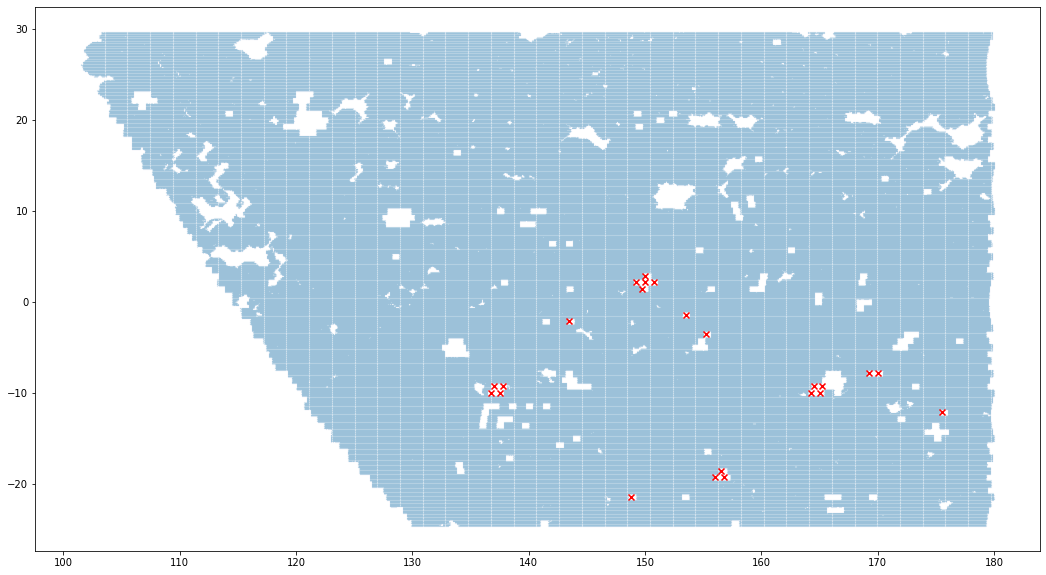

In [23]:
mplot.figure(figsize=(18,10))
mplot.scatter(ra_footprint, dec_footprint, marker='.', s=0.01)
mplot.scatter(RA_tile, DEC_tile, marker='x', c='r')

In [15]:
len(map_counts[map_counts>0]), len(ra), len(ra_mask)

(993829, 111596425, 56876460)

In [16]:
len(map_counts[map_counts>0])/len(map_counts)*np.pi*(180**2/np.pi**2)*4

3258.2592348694093